# Problem 2


<img src="Exercicio 1-2-1.png">
<img src="Exercicio 1-2-2.png">
<img src="Exercicio 1-2-3.png">
<img src="Exercicio 1-2-4.png">

# Importing Libraries

In [2]:

import pennylane as qml
from pennylane import numpy as pnp



# Initializating the Hydrogen Atom

In [3]:
symbols =  ["H","H"]

distance1=float(input("Enter the x interatomic coordinate of the first Hidrogen Atom: "))
distance2=float(input("Enter the y interatomic coordinate of the first Hidrogen Atom: "))
distance3=float(input("Enter the z interatomic coordinate of the first Hidrogen Atom: "))
distance4=float(input("Enter the x interatomic coordinate of the second Hidrogen Atom: "))
distance5=float(input("Enter the y interatomic coordinate of the second Hidrogen Atom: "))
distance6=float(input("Enter the z interatomic coordinate of the second Hidrogen Atom: "))
coordinates = pnp.array([[distance1,distance2,distance3],[distance4,distance5,distance6]]) # 0.6614 is the typical interatomic distance

# Molecule + Molecular Hamiltonian

## Molecule

In [10]:
# Build the molecular Hamiltonian (in second-quantized form and mapped to qubits via Jordan-Wigner transformation)
# Specify the basis set, multiplicity, and charge
basis_set = 'sto-3g'    # STO-3G basis set
multiplicity = 1        # Singlet state (multiplicity = 2S + 1)
charge = 0              # Neutral molecule

# Create the Molecule object with explicit parameters
molecule = qml.qchem.Molecule(
    symbols=symbols,
    coordinates=coordinates,
    charge=charge,
    mult=multiplicity,
    basis_name=basis_set
)

## Molecular Hamiltonian

In [11]:
H,qubits = qml.qchem.molecular_hamiltonian(molecule)

## Why we need the Pauli-Z in the Jordan- Wigner Transformation?

...

## How to calculate the ground state energy?

### Defining the HF State

In [12]:
electrons = 2
orbitals = qubits 


hf = qml.qchem.hf_state(electrons,orbitals)
print(hf)

[1 1 0 0]


## Defining the variational circuit

C: PQ esse doubleexcitation ta aqui? Conseguimos melhorar esse circuito? só implementei o hartree fock, nao sei exatamente as tecnicas de otimizaçao que ele quer que a gt use.

In [15]:

#Define variational circuit that prepares ansatze
def circuit_H2_VQE(param, wires):
    #Prepares HF basis state in the circuit to initialize the circuit
    qml.BasisState(hf,wires = wires)
    #Parametrize coupling between HF state and doubly-excited state
    qml.DoubleExcitation(param,wires = [0,1,2,3])

# C: Pq esse doubleexcitation ta aqui?

# Creating the Circuit and Optimizing it

(<Figure size 500x500 with 1 Axes>, <Axes: >)

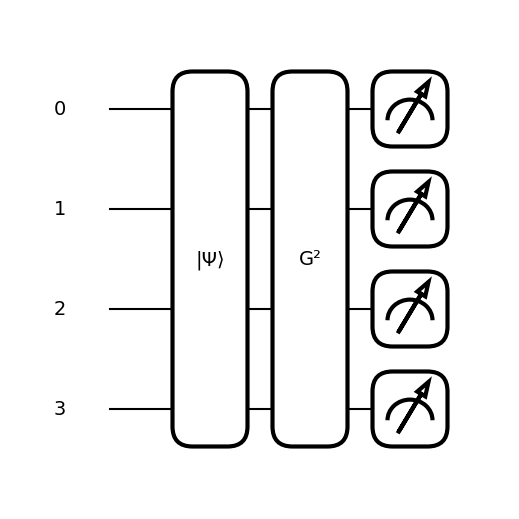

In [16]:
#Define device to use
#C: Following pennylane's ordering.
dev = qml.device("default.qubit", wires = qubits)

#Create QNode associated with cost function
#C: as were trying to minimize the energy, the expectation value of the hamiltonian is the value we're trying to minimize
@qml.qnode(dev)
def cost_fn(param):
    circuit_H2_VQE(param, wires = range(qubits))

    return qml.expval(H)
#C: we declared the H earlier.

#Draw circuit
qml.draw_mpl(cost_fn)(0.2)



# Optimization Routine

In [18]:
# Choose an optimizer
opt = qml.GradientDescentOptimizer(stepsize = 0.4)

#Choose an initial parameter for the variation circuit (angle of Givens rotation)
theta = pnp.array(2.0,requires_grad = True)


In [19]:
# store the values of the cost function
energy = [cost_fn(theta)]

# store the values of the circuit parameter


angle = [theta]
conv_tol = 1e-06
max_iterations = 40
#Repetition of optimization until convergence

for n in range(max_iterations):
    theta,prev_energy=opt.step_and_cost(cost_fn,theta)
    energy.append(cost_fn(theta))
    angle.append(theta)
    conv=pnp.abs(energy[-1]-prev_energy)
    if n%2==0:
        print(f"step = {n}, Energy: {energy}")

    if conv<=conv_tol:
        break


#C: THIS WILL BE OUR RETURN FUNCTION
print("\n" f"Final value of the ground-state energy = {energy[-1]:.8f} Ha")




#print("\n" f"Optimal value of the circuit parameter = {angle[-1]:.4f}")
# this is not asked for

step = 0, Energy: [tensor(-0.08925125, requires_grad=True), tensor(-0.37609629, requires_grad=True)]
step = 2, Energy: [tensor(-0.08925125, requires_grad=True), tensor(-0.37609629, requires_grad=True), tensor(-0.65639851, requires_grad=True), tensor(-0.87262819, requires_grad=True)]
step = 4, Energy: [tensor(-0.08925125, requires_grad=True), tensor(-0.37609629, requires_grad=True), tensor(-0.65639851, requires_grad=True), tensor(-0.87262819, requires_grad=True), tensor(-1.00634643, requires_grad=True), tensor(-1.07643604, requires_grad=True)]
step = 6, Energy: [tensor(-0.08925125, requires_grad=True), tensor(-0.37609629, requires_grad=True), tensor(-0.65639851, requires_grad=True), tensor(-0.87262819, requires_grad=True), tensor(-1.00634643, requires_grad=True), tensor(-1.07643604, requires_grad=True), tensor(-1.10966268, requires_grad=True), tensor(-1.12461301, requires_grad=True)]
step = 8, Energy: [tensor(-0.08925125, requires_grad=True), tensor(-0.37609629, requires_grad=True), ten

# Plotting the results

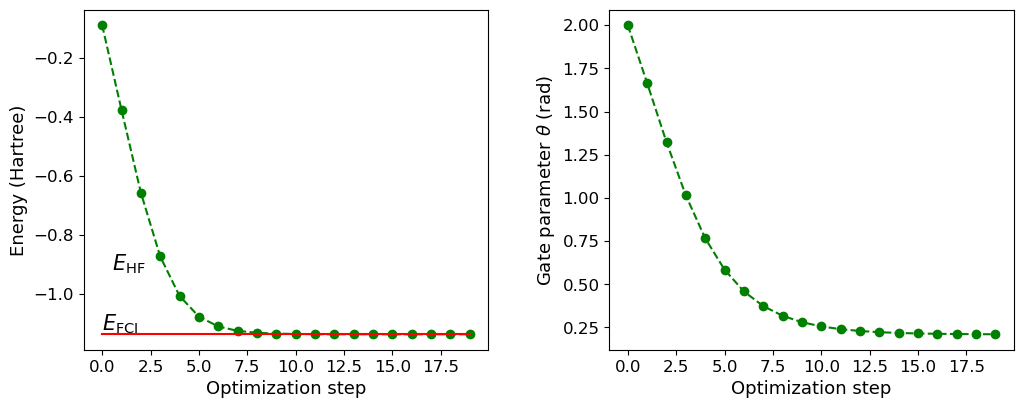

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(12)

# Full configuration interaction (FCI) energy computed classically
E_fci = -1.136189454088

# Add energy plot on column 1
ax1 = fig.add_subplot(121)
ax1.plot(range(n + 2), energy, "go", ls="dashed")
ax1.plot(range(n + 2), pnp.full(n + 2, E_fci), color="red")
ax1.set_xlabel("Optimization step", fontsize=13)
ax1.set_ylabel("Energy (Hartree)", fontsize=13)
ax1.text(0.5, -0.9176, r"$E_\mathrm{HF}$", fontsize=15)
ax1.text(0, -1.1207, r"$E_\mathrm{FCI}$", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add angle plot on column 2
ax2 = fig.add_subplot(122)
ax2.plot(range(n + 2), angle, "go", ls="dashed")
ax2.set_xlabel("Optimization step", fontsize=13)
ax2.set_ylabel("Gate parameter $\\theta$ (rad)", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplots_adjust(wspace=0.3, bottom=0.2)
plt.show()